https://www.kaggle.com/spiffler/practicing-machine-learning-basics

# Practicing Machine Learning Basics

Spiff

using data from Iris Species 

I am going to start with converting the Dataframe into numpy array for use with sklearn (I do not know if this is the best thing to do at this stage, I am only trying to practice the basic libraries in sklearn).

Since I also have the data in a dataframe, I can use that for the basic visualisations which I am more comfortable doing on dataframes

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "."]).decode("utf8"))

# Any results you write to the current directory are saved as output.

database.sqlite
Iris.csv
Practicing Machine Learning Basics-Python-Copy1.ipynb
Practicing Machine Learning Basics-Python.ipynb



In [2]:
iris = pd.read_csv('Iris.csv')
iris['Species'] = iris['Species'].astype('category')
iris = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']]

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(iris['Species'])
iris_target = le.transform(iris['Species'])
iris_data = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].as_matrix() #i dont think ID is of any use
print(iris_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
iris.info()
iris.describe()
iris["Species"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null category
dtypes: category(1), float64(4)
memory usage: 5.0 KB


Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [4]:
# ok just went and did a super quick check on what is the meaning of sepal! (I knew what petal is)
# Lets try and plot this to get some basic insights into the data

import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(style="ticks", color_codes=True)
# sns.pairplot(data=iris, hue='Species')

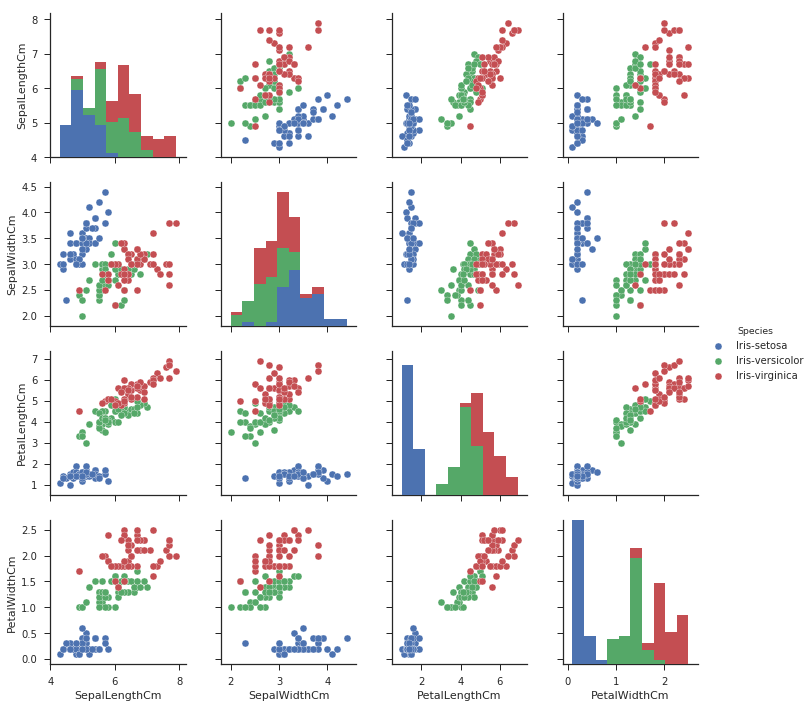

In [5]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=iris, hue='Species')


Ok looks like Setosa has a different scale - versicolor and virginica showing overlaps. 
In terms of the features - if I look at the histograms, SepalWidth and SepalLength seem to have overlaps of species. But if you see PetalLength and PetalWidth, there is lesser mixing of different colours on the same bars.. which tells me that there is some decision boundary that can be drawn from there.. I think I will use those 2 as my main features to carry out the exercises below!

Now - what I am parallely doing is going through 'Introduction to Machine Learning' course on Udacity 
(Have found Udacity, really good with basics, finished their Descriptive and Inferential Statistics 
 before this) AND also doing Kirill Ermenko's "Machine Learning A_Z" on Udemy - which is a lot more handson
but not superawesome on intuition

To aid the learning on those two, I decided to pick a simple dataset myself - Iris - and do this on the side.

I hope to write down my my thinking as well as I go along based on my learnings from the course

I was going through some of the studies with others have done on Iris (surely more experienced ppl than me, and I learnt this bit about being able to look at your data even better.. so will be applying that below (few points below were all learnt from Adil Rizvi's Iris Classification)

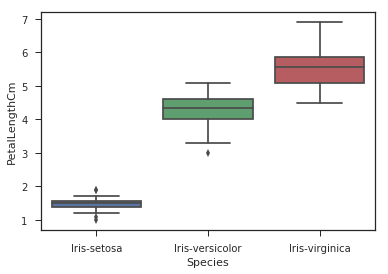

In [6]:
# average petallength for every species
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)

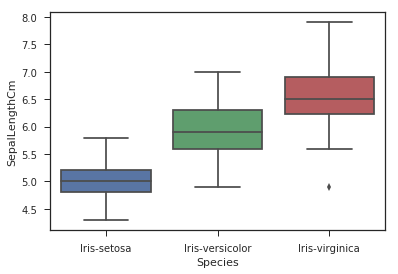

In [7]:
# average sepallength for every species
sns.boxplot(x='Species', y='SepalLengthCm', data=iris)

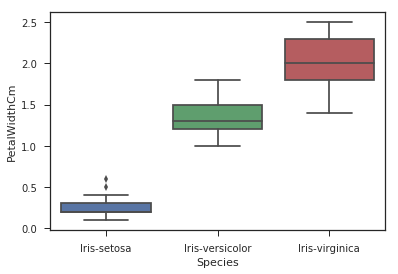

In [8]:
# average petalwidth for every species
sns.boxplot(x='Species', y='PetalWidthCm', data=iris)

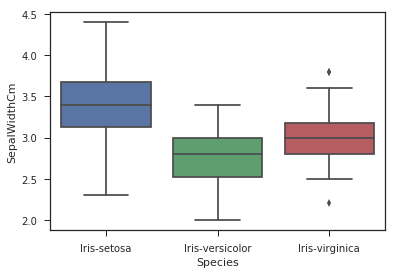

In [9]:
# average sepalwidth for every species
sns.boxplot(x='Species', y='SepalWidthCm', data=iris)

So Petal Length and Petal Width seems like they help well with a decision boundary from the above charts - confirming the insights I was able to draw from my pairplot above.

### 1. Use 2 features of Petal (length and width)

In [10]:
# setting features to be used to be Petal Lengtha nd Width
features = iris.iloc[:,2:4].values
labels = iris.iloc[:,4].values

In [11]:
# Encoding the categorical Dependent Variable

from sklearn.preprocessing import LabelEncoder
labelencoder_labels = LabelEncoder()
labels = labelencoder_labels.fit_transform(labels)

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.20, random_state = 43)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

OK - missed on all the commentary that I had made the last time around on my thinking..
Unfortunately, when I wrote the above stuff again, I felt much more confident and hence see not much commentary..
anyways... moving on

next steps are the models.. starting with Naive Bayes

In [14]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(labels_test, labels_pred)
print(cmat)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

[[13  0  0]
 [ 0  8  0]
 [ 0  0  9]]
1.0


Now lets take a look at this classification

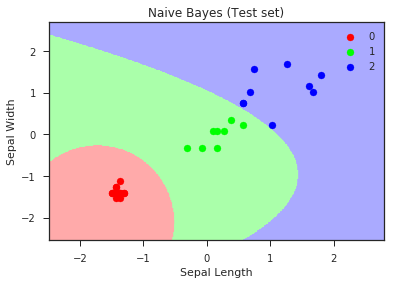

In [15]:
# Visualising the Test set results (based the Udemy course by Kirill Ermenko/ Hadelin + sklearn examples)
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X_set, y_set = features_test, labels_test
xx, yy = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.pcolormesh(xx, yy, clf.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape),
             alpha = 0.75, cmap = cmap_light )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = cmap_bold(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

In [16]:
# Fitting KNN to the Training set
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(labels_test, labels_pred)
print(cmat)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

[[13  0  0]
 [ 0  8  0]
 [ 0  0  9]]
1.0


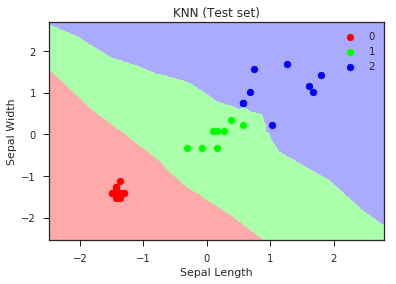

In [17]:
# Visualising the Test set results (based the Udemy course by Kirill Ermenko/ Hadelin + sklearn examples)
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X_set, y_set = features_test, labels_test
xx, yy = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.pcolormesh(xx, yy, clf.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape),
             alpha = 0.75, cmap = cmap_light )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = cmap_bold(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

KNN seems to have done a good job too here.. next I will do the SVM, linear (yet to finish studying about SVM RBF.. so will do that once I get the understanding)

In [18]:
# Fitting SVM Linear to the Training set
from sklearn.svm import SVC
clf = SVC(kernel='linear', random_state=43)
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(labels_test, labels_pred)
print(cmat)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

[[13  0  0]
 [ 0  8  0]
 [ 0  1  8]]
0.966666666667


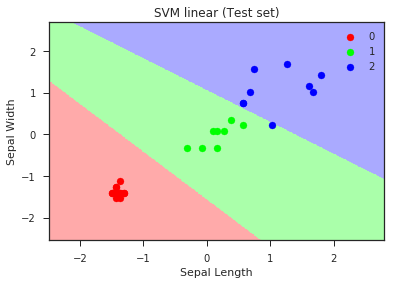

In [19]:
# Visualising the Test set results (based the Udemy course by Kirill Ermenko/ Hadelin + sklearn examples)
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X_set, y_set = features_test, labels_test
xx, yy = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.pcolormesh(xx, yy, clf.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape),
             alpha = 0.75, cmap = cmap_light )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = cmap_bold(i), label = j)
plt.title('SVM linear (Test set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

In [20]:
# Fitting SVM RBF to the Training set
from sklearn.svm import SVC
clf = SVC(kernel='rbf', random_state=43)
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(labels_test, labels_pred)
print(cmat)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

[[13  0  0]
 [ 0  8  0]
 [ 0  1  8]]
0.966666666667


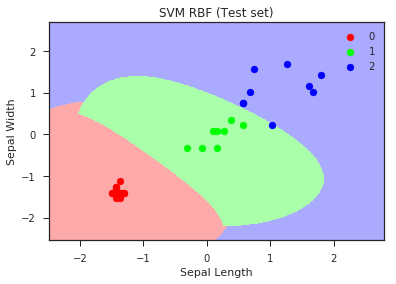

In [21]:
# Visualising the Test set results (based the Udemy course by Kirill Ermenko/ Hadelin + sklearn examples)
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X_set, y_set = features_test, labels_test
xx, yy = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.pcolormesh(xx, yy, clf.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape),
             alpha = 0.75, cmap = cmap_light )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = cmap_bold(i), label = j)
plt.title('SVM RBF (Test set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

Ok - lets play with the gamma function now

In [22]:
# Fitting SVM RBF to the Training set
from sklearn.svm import SVC
clf = SVC(kernel='rbf', random_state=43, gamma = 0.5)
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(labels_test, labels_pred)
print(cmat)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

[[13  0  0]
 [ 0  8  0]
 [ 0  1  8]]
0.966666666667


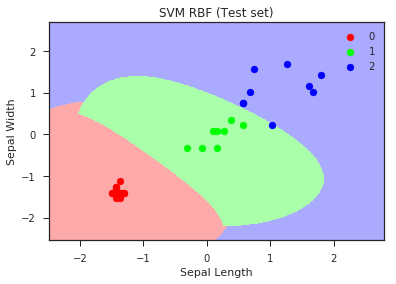

In [23]:
# Visualising the Test set results (based the Udemy course by Kirill Ermenko/ Hadelin + sklearn examples)
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X_set, y_set = features_test, labels_test
xx, yy = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.pcolormesh(xx, yy, clf.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape),
             alpha = 0.75, cmap = cmap_light )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = cmap_bold(i), label = j)
plt.title('SVM RBF (Test set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

Nice - its too early to say, but just playing around has given me a better sense of things here. 
I want to try with more features (all 4) and also with other combinations
Maybe after I have done decision trees and random forest, I will work on trying to check accuracy of all models at one go and then fine tune the one with the best results and see how that goes.
Onwards and upwards!

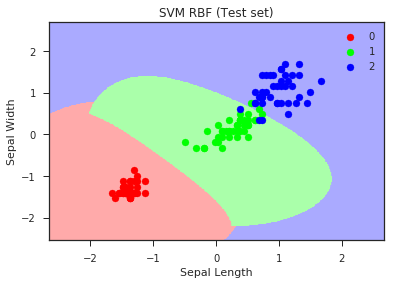

In [24]:
# Visualising the TRAINING set results (based the Udemy course by Kirill Ermenko/ Hadelin + sklearn examples)
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X_set, y_set = features_train, labels_train
xx, yy = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.pcolormesh(xx, yy, clf.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape),
             alpha = 0.75, cmap = cmap_light )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = cmap_bold(i), label = j)
plt.title('SVM RBF (Test set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

In [25]:
# It is ok to not use feature scaling when using decision trees - i will just keep it in for now

# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(labels_test, labels_pred)
print(cmat)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

[[13  0  0]
 [ 0  8  0]
 [ 0  2  7]]
0.933333333333


In [26]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


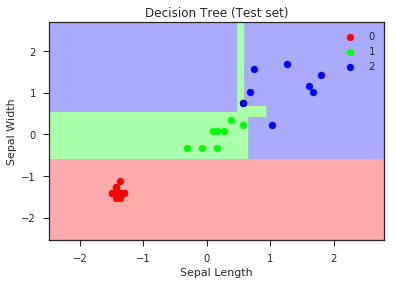

In [27]:
# Visualising the Test set results (based the Udemy course by Kirill Ermenko/ Hadelin + sklearn examples)
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X_set, y_set = features_test, labels_test
xx, yy = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.pcolormesh(xx, yy, clf.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape),
             alpha = 0.75, cmap = cmap_light )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = cmap_bold(i), label = j)
plt.title('Decision Tree (Test set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

In [28]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 7, criterion='entropy', random_state=43)
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(labels_test, labels_pred)
print(cmat)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

[[13  0  0]
 [ 0  8  0]
 [ 0  2  7]]
0.933333333333


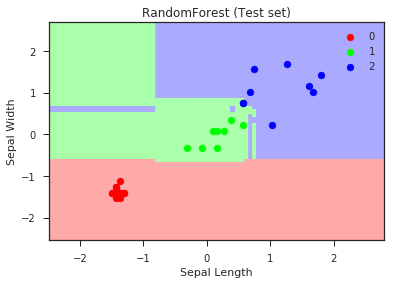

In [29]:
# Visualising the Test set results (based the Udemy course by Kirill Ermenko/ Hadelin + sklearn examples)
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X_set, y_set = features_test, labels_test
xx, yy = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.pcolormesh(xx, yy, clf.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape),
             alpha = 0.75, cmap = cmap_light )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = cmap_bold(i), label = j)
plt.title('RandomForest (Test set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

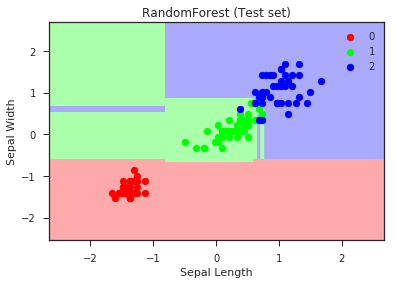

In [30]:
# Visualising the TRAINING set results (based the Udemy course by Kirill Ermenko/ Hadelin + sklearn examples)
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X_set, y_set = features_train, labels_train
xx, yy = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.pcolormesh(xx, yy, clf.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape),
             alpha = 0.75, cmap = cmap_light )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = cmap_bold(i), label = j)
plt.title('RandomForest (Test set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

### 2. Use 2 features of Sepal (length and width)

Now what we can see here is that the accuracy numbers are indeed pretty cool. I had earlier done this exercise with Sepal (length and width, and the accurancy was quite low) I will try and put those numbers also below just so we have a good comparison point as to how much initial data can help

In [31]:
# setting features to be used to be Sepal Length and Width
features = iris.iloc[:,0:2].values
labels = iris.iloc[:,4].values

# Encoding the categorical Dependent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_labels = LabelEncoder()
labels = labelencoder_labels.fit_transform(labels)

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.20, random_state = 43)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

In [32]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

0.8


In [33]:
# Fitting KNN to the Training set
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

0.866666666667


In [34]:
# Fitting SVM Linear to the Training set
from sklearn.svm import SVC
clf = SVC(kernel='linear', random_state=43)
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

0.8


In [35]:
# Fitting SVM RBF to the Training set
from sklearn.svm import SVC
clf = SVC(kernel='rbf', random_state=43)
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

0.8


In [36]:
# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

0.733333333333


In [37]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 7, criterion='entropy', random_state=43)
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

0.766666666667


As we can see, the best that we are getting with Sepals is 87%.. and is consistently in the 70s and 80s 
But Petal size did so much better.

Learning for me, spend time on picking the features

### 3. Use 4 features of Sepal & Petal (length and width)

In [38]:
# setting features to be used to be Sepal & Petal Length and Width
features = iris.iloc[:,0:4].values
labels = iris.iloc[:,4].values

# Encoding the categorical Dependent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_labels = LabelEncoder()
labels = labelencoder_labels.fit_transform(labels)

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.20, random_state = 43)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

In [39]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

0.966666666667


In [40]:
# Fitting KNN to the Training set
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

0.933333333333


In [41]:
# Fitting SVM Linear to the Training set
from sklearn.svm import SVC
clf = SVC(kernel='linear', random_state=43)
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

1.0


In [42]:
# Fitting SVM RBF to the Training set
from sklearn.svm import SVC
clf = SVC(kernel='rbf', random_state=43)
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

1.0


In [43]:
# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

0.9


In [44]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 7, criterion='entropy', random_state=43)
clf.fit(features_train, labels_train)

# Predicting the Test set results
labels_pred = clf.predict(features_test)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_pred))

0.9
